<a href="https://colab.research.google.com/github/codewithkaran3/quant/blob/main/quant1_pullbacktrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pullback trading strategy based on RSI with Period 10**

Trading instrument = S&P500

Entry condition:
1) S&P500 price > 200 day moving average
2) 10 period RSI below 30 (buy the next day's open)

Exit:
10 period RSI above 40 and after 10 trading days ( sell on next day's open)


In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 615 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import yfinance as yf

In [5]:
df = yf.download('^GSPC', start ="1996-01-01", end = "2020-11-01")

[*********************100%***********************]  1 of 1 completed


In [6]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-19,3493.659912,3502.419922,3419.929932,3426.919922,3426.919922,4091080000
2020-10-20,3439.379883,3476.929932,3435.649902,3443.120117,3443.120117,3917850000
2020-10-21,3439.909912,3464.860107,3433.060059,3435.560059,3435.560059,4103960000
2020-10-22,3438.500000,3460.530029,3415.340088,3453.489990,3453.489990,4172060000
2020-10-23,3464.899902,3466.459961,3440.449951,3465.389893,3465.389893,3651600000
2020-10-26,3441.419922,3441.419922,3364.860107,3400.969971,3400.969971,4002210000
2020-10-27,3403.149902,3409.510010,3388.709961,3390.679932,3390.679932,3962400000
2020-10-28,3342.479980,3342.479980,3268.889893,3271.030029,3271.030029,5139970000
2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4911860000


In [7]:
import pandas as pd
import numpy as np

In [9]:
df['MA200'] = df['Adj Close'].rolling(window=200).mean()

In [10]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200
Date,,,,,,,
1996-01-02,615.929993,620.739990,613.169983,620.729980,620.729980,364180000,NaN
1996-01-03,620.729980,623.250000,619.559998,621.320007,621.320007,468950000,NaN
1996-01-04,621.320007,624.489990,613.960022,617.700012,617.700012,512580000,NaN
1996-01-05,617.700012,617.700012,612.020020,616.710022,616.710022,437110000,NaN
1996-01-08,616.710022,618.460022,616.489990,618.460022,618.460022,130360000,NaN
...,...,...,...,...,...,...,...
2020-10-26,3441.419922,3441.419922,3364.860107,3400.969971,3400.969971,4002210000,3129.149098
2020-10-27,3403.149902,3409.510010,3388.709961,3390.679932,3390.679932,3962400000,3129.661848
2020-10-28,3342.479980,3342.479980,3268.889893,3271.030029,3271.030029,5139970000,3129.601249


In [11]:
df = df.dropna()

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200
Date,,,,,,,
1996-10-14,700.659973,705.159973,700.659973,703.539978,703.539978,322000000,654.137300
1996-10-15,703.539978,708.070007,699.070007,702.570007,702.570007,458980000,654.546501
1996-10-16,702.570007,704.419983,699.150024,704.409973,704.409973,441410000,654.961950
1996-10-17,705.000000,708.520020,704.760010,706.989990,706.989990,478550000,655.408400
1996-10-18,706.989990,711.039978,706.109985,710.820007,710.820007,473020000,655.878950
...,...,...,...,...,...,...,...
2020-10-26,3441.419922,3441.419922,3364.860107,3400.969971,3400.969971,4002210000,3129.149098
2020-10-27,3403.149902,3409.510010,3388.709961,3390.679932,3390.679932,3962400000,3129.661848
2020-10-28,3342.479980,3342.479980,3268.889893,3271.030029,3271.030029,5139970000,3129.601249


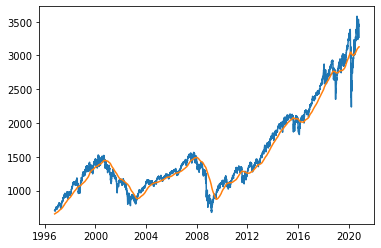

In [13]:
import matplotlib.pyplot as plt
plt.plot(df['Adj Close'])
plt.plot(df['MA200'])
plt.show()


using price change method

In [14]:
df['price change'] = df['Adj Close'].pct_change()

<ipython-input-14-29e39629e417>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price change'] = df['Adj Close'].pct_change()


In [15]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price change
Date,,,,,,,,
1996-10-14,700.659973,705.159973,700.659973,703.539978,703.539978,322000000,654.137300,NaN
1996-10-15,703.539978,708.070007,699.070007,702.570007,702.570007,458980000,654.546501,-0.001379
1996-10-16,702.570007,704.419983,699.150024,704.409973,704.409973,441410000,654.961950,0.002619
1996-10-17,705.000000,708.520020,704.760010,706.989990,706.989990,478550000,655.408400,0.003663
1996-10-18,706.989990,711.039978,706.109985,710.820007,710.820007,473020000,655.878950,0.005417
...,...,...,...,...,...,...,...,...
2020-10-26,3441.419922,3441.419922,3364.860107,3400.969971,3400.969971,4002210000,3129.149098,-0.018590
2020-10-27,3403.149902,3409.510010,3388.709961,3390.679932,3390.679932,3962400000,3129.661848,-0.003026
2020-10-28,3342.479980,3342.479980,3268.889893,3271.030029,3271.030029,5139970000,3129.601249,-0.035288


In [16]:
df = df.dropna()

In [17]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price change
Date,,,,,,,,
1996-10-15,703.539978,708.070007,699.070007,702.570007,702.570007,458980000,654.546501,-0.001379
1996-10-16,702.570007,704.419983,699.150024,704.409973,704.409973,441410000,654.961950,0.002619
1996-10-17,705.000000,708.520020,704.760010,706.989990,706.989990,478550000,655.408400,0.003663
1996-10-18,706.989990,711.039978,706.109985,710.820007,710.820007,473020000,655.878950,0.005417
1996-10-21,710.820007,714.099976,707.710022,709.849976,709.849976,414630000,656.335900,-0.001365
...,...,...,...,...,...,...,...,...
2020-10-26,3441.419922,3441.419922,3364.860107,3400.969971,3400.969971,4002210000,3129.149098,-0.018590
2020-10-27,3403.149902,3409.510010,3388.709961,3390.679932,3390.679932,3962400000,3129.661848,-0.003026
2020-10-28,3342.479980,3342.479980,3268.889893,3271.030029,3271.030029,5139970000,3129.601249,-0.035288


In [19]:
df['upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)

<ipython-input-19-3df9aa2c75c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)


In [20]:
df['downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0 )

<ipython-input-20-df7f5f2440fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0 )


we need to calculate avg up and avg down in order to calculate RSI. 
more about RSI calculation here: https://www.macroption.com/rsi-calculation/


In [21]:
df['avg up'] = df['upmove'].ewm(span=19).mean()

<ipython-input-21-fc1a9448a777>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg up'] = df['upmove'].ewm(span=19).mean()


In this trading strategy, we are taking RSI period as 10. RSI can be calculated using wilder method, where alpha = 1/period that is (1/10) 

But python don't have any method to calculate wilder's RSI, therefore we are calculating RSI with expoonential moving average where alpha = 2/(n+1)
this is why we are taking value of 19

In [22]:
df['avg down'] = df['downmove'].ewm(span=19).mean()

<ipython-input-22-bbd82c5e6b4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg down'] = df['downmove'].ewm(span=19).mean()


In [23]:
df = df.dropna()

In [24]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,upmove,downmove,avg up,avg down
Date,,,,,,,,,,,,
1996-10-15,703.539978,708.070007,699.070007,702.570007,702.570007,458980000,654.546501,-0.001379,0.000000,0.001379,0.000000,0.001379
1996-10-16,702.570007,704.419983,699.150024,704.409973,704.409973,441410000,654.961950,0.002619,0.002619,0.000000,0.001378,0.000653
1996-10-17,705.000000,708.520020,704.760010,706.989990,706.989990,478550000,655.408400,0.003663,0.003663,0.000000,0.002221,0.000412
1996-10-18,706.989990,711.039978,706.109985,710.820007,710.820007,473020000,655.878950,0.005417,0.005417,0.000000,0.003151,0.000292
1996-10-21,710.820007,714.099976,707.710022,709.849976,709.849976,414630000,656.335900,-0.001365,0.000000,0.001365,0.002381,0.000554
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,3441.419922,3441.419922,3364.860107,3400.969971,3400.969971,4002210000,3129.149098,-0.018590,0.000000,0.018590,0.003889,0.004840
2020-10-27,3403.149902,3409.510010,3388.709961,3390.679932,3390.679932,3962400000,3129.661848,-0.003026,0.000000,0.003026,0.003500,0.004658
2020-10-28,3342.479980,3342.479980,3268.889893,3271.030029,3271.030029,5139970000,3129.601249,-0.035288,0.000000,0.035288,0.003150,0.007721


In [25]:
df['RS'] = df['avg up'] / df['avg down']

using lambda function : we are doing operations on all the elements of vertical column RS

In [26]:
df['RSI'] = df['RS'].apply(lambda x: 100 -(100/(x+1)))

In [27]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,upmove,downmove,avg up,avg down,RS,RSI
Date,,,,,,,,,,,,,,
1996-10-15,703.539978,708.070007,699.070007,702.570007,702.570007,458980000,654.546501,-0.001379,0.000000,0.001379,0.000000,0.001379,0.000000,0.000000
1996-10-16,702.570007,704.419983,699.150024,704.409973,704.409973,441410000,654.961950,0.002619,0.002619,0.000000,0.001378,0.000653,2.110609,67.851955
1996-10-17,705.000000,708.520020,704.760010,706.989990,706.989990,478550000,655.408400,0.003663,0.003663,0.000000,0.002221,0.000412,5.390370,84.351455
1996-10-18,706.989990,711.039978,706.109985,710.820007,710.820007,473020000,655.878950,0.005417,0.005417,0.000000,0.003151,0.000292,10.780387,91.511314
1996-10-21,710.820007,714.099976,707.710022,709.849976,709.849976,414630000,656.335900,-0.001365,0.000000,0.001365,0.002381,0.000554,4.297298,81.122453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,3441.419922,3441.419922,3364.860107,3400.969971,3400.969971,4002210000,3129.149098,-0.018590,0.000000,0.018590,0.003889,0.004840,0.803529,44.553152
2020-10-27,3403.149902,3409.510010,3388.709961,3390.679932,3390.679932,3962400000,3129.661848,-0.003026,0.000000,0.003026,0.003500,0.004658,0.751341,42.900886
2020-10-28,3342.479980,3342.479980,3268.889893,3271.030029,3271.030029,5139970000,3129.601249,-0.035288,0.000000,0.035288,0.003150,0.007721,0.407967,28.975630


**Defining entry/ buy **

In [32]:
df.loc[(df['Adj Close']> df['MA200'])  & (df['RSI'] < 30) , 'BUY'] = 'Yes'

In [37]:
df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30) , 'BUY'] = 'No'

In [38]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,upmove,downmove,avg up,avg down,RS,RSI,BUY
Date,,,,,,,,,,,,,,,
1996-10-15,703.539978,708.070007,699.070007,702.570007,702.570007,458980000,654.546501,-0.001379,0.000000,0.001379,0.000000,0.001379,0.000000,0.000000,Yes
1996-10-16,702.570007,704.419983,699.150024,704.409973,704.409973,441410000,654.961950,0.002619,0.002619,0.000000,0.001378,0.000653,2.110609,67.851955,No
1996-10-17,705.000000,708.520020,704.760010,706.989990,706.989990,478550000,655.408400,0.003663,0.003663,0.000000,0.002221,0.000412,5.390370,84.351455,No
1996-10-18,706.989990,711.039978,706.109985,710.820007,710.820007,473020000,655.878950,0.005417,0.005417,0.000000,0.003151,0.000292,10.780387,91.511314,No
1996-10-21,710.820007,714.099976,707.710022,709.849976,709.849976,414630000,656.335900,-0.001365,0.000000,0.001365,0.002381,0.000554,4.297298,81.122453,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,3441.419922,3441.419922,3364.860107,3400.969971,3400.969971,4002210000,3129.149098,-0.018590,0.000000,0.018590,0.003889,0.004840,0.803529,44.553152,No
2020-10-27,3403.149902,3409.510010,3388.709961,3390.679932,3390.679932,3962400000,3129.661848,-0.003026,0.000000,0.003026,0.003500,0.004658,0.751341,42.900886,No
2020-10-28,3342.479980,3342.479980,3268.889893,3271.030029,3271.030029,5139970000,3129.601249,-0.035288,0.000000,0.035288,0.003150,0.007721,0.407967,28.975630,Yes


Defined an empty list and then calculated all the pnl

In [41]:
pnl = []

for i in range(len(df)-12):
  if "Yes" in df['BUY'].iloc[i]:
    for j in range(1,11):
      if df['RSI'].iloc[i]>40:
        pnl.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])
        break
      if df['RSI'].iloc[i+j] < 40:
        pnl.append(df['Open'].iloc[i+12]- df['Open'].iloc[i+1])
        break


In [42]:
pnl

[-1.66998291015625,
 16.030029296875,
 -2.4000244140625,
 3.8900146484375,
 11.6600341796875,
 16.02001953125,
 35.30999755859375,
 46.7900390625,
 25.9400634765625,
 10.169921875,
 15.2099609375,
 18.419921875,
 18.260009765625,
 59.929931640625,
 65.699951171875,
 100.3599853515625,
 29.7799072265625,
 1.280029296875,
 25.9300537109375,
 19.4300537109375,
 8.669921875,
 9.7899169921875,
 8.4300537109375,
 17.9100341796875,
 3.419921875,
 -3.4200439453125,
 -5.9801025390625,
 -6.1400146484375,
 -11.530029296875,
 -16.2100830078125,
 14.9300537109375,
 36.8599853515625,
 -6.06005859375,
 22.25,
 -42.260009765625,
 -54.8499755859375,
 67.8699951171875,
 9.169921875,
 1.969970703125,
 3.4100341796875,
 8.89990234375,
 24.6300048828125,
 31.6600341796875,
 -25.27001953125,
 -20.9100341796875,
 -46.5299072265625,
 -27.2301025390625,
 -10.1199951171875,
 6.469970703125,
 11.8199462890625,
 37.1199951171875,
 51.2899169921875,
 85.4200439453125,
 28.5599365234375,
 46.1099853515625,
 72.1899

In [47]:
len([i for i in pnl if i >0])

49

In [48]:
len(pnl)

69

Total trades : 69
winning trades: 49
winRate = 49/69 = 71%

In [49]:
len([i for i in pnl if i >0])/ len(pnl)

0.7101449275362319